<a href="https://colab.research.google.com/github/YianKim/2022_PythonStudy_face_emotion_recognition/blob/main/Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 구글 드라이브


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 라이브러리 불러오기


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import PIL
import pickle
import random

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import LSTM
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.metrics import accuracy_score
from keras.models import load_model

## 데이터 불러오기

FER2013.csv : 35887 images

![Dataset overview](https://i.imgur.com/vqlEXw2.png) 

48*48 이미지. value 0~255



In [ ]:
def load_data(dataset_path):
  
  #classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprsie', 'Neutral']

  data = []
  test_data = []
  test_labels = []
  labels =[]

  with open(dataset_path, 'r') as file:
      for line_no, line in enumerate(file.readlines()):
          if 0 < line_no <= 35887:
            curr_class, line, set_type = line.split(',')
            image_data = np.asarray([int(x) for x in line.split()]).reshape(48, 48)
            image_data =image_data.astype(np.uint8)/255.0

            if (set_type.strip() == 'PrivateTest'):
              
              test_data.append(image_data)
              test_labels.append(curr_class)
            else:
              data.append(image_data)
              labels.append(curr_class)
      
      test_data = np.expand_dims(test_data, -1)
      test_labels = to_categorical(test_labels, num_classes = 7)
      data = np.expand_dims(data, -1)   
      labels = to_categorical(labels, num_classes = 7)
    
      return np.array(data), np.array(labels), np.array(test_data), np.array(test_labels)

In [ ]:
dataset_path = "/content/drive/MyDrive/파이썬스터디 프로젝트/fer2013.csv/fer2013.csv"
train_data, train_labels, test_data, test_labels = load_data(dataset_path)
#train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = test_size,random_state = seed)

print("Number of images in Training set:", len(train_data))
print("Number of images in Test set:", len(test_data))

Number of images in Training set: 32298
Number of images in Test set: 3589


In [ ]:
train_data.shape

(32298, 48, 48, 1)

## 증강

In [ ]:
# temp = np.array(255*np.reshape(train_data[0,0:48,0:48],(48,48)), dtype=np.uint8)

In [ ]:
# matrix48 = []

# for i in range(48):
#   L = [0 for i in range(48)]
#   L[47-i] = 1
#   matrix48.append(L)

# matrix48 = np.array(matrix48)

In [ ]:
# PIL.Image.fromarray(temp)

In [ ]:
# PIL.Image.fromarray( np.array(temp.dot(matrix48), dtype=np.uint8) )

In [ ]:
# PIL.Image.fromarray( np.array(np.transpose(temp), dtype=np.uint8) )

In [ ]:
# PIL.Image.fromarray( np.array(np.transpose(temp.dot(matrix48)), dtype=np.uint8) )

In [ ]:
# aug_array1 = []
# aug_array2 = []
# aug_array3 = []

In [ ]:
# for k in range(32298):
#   temp = np.array(255*np.reshape(train_data[k,0:48,0:48],(48,48)), dtype=np.uint8)
#   aug_array1.append((temp.dot(matrix48)/255).tolist())

# aug_array1 = np.reshape(np.array(aug_array1),(32298, 48, 48, 1))

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/aug_array1.pkl', 'wb') as f:
# 	pickle.dump(aug_array1, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# for k in range(32298):
#   temp = np.array(255*np.reshape(train_data[k,0:48,0:48],(48,48)), dtype=np.uint8)
#   aug_array2.append((np.transpose(temp)/255).tolist())

# aug_array2 = np.reshape(np.array(aug_array2),(32298, 48, 48, 1))

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/aug_array2.pkl', 'wb') as f:
# 	pickle.dump(aug_array2, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# for k in range(32298):
#   temp = np.array(255*np.reshape(train_data[k,0:48,0:48],(48,48)), dtype=np.uint8)
#   aug_array3.append((np.transpose(temp.dot(matrix48))/255).tolist())

# aug_array3 = np.reshape(np.array(aug_array3),(32298, 48, 48, 1))

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/aug_array3.pkl', 'wb') as f:
# 	pickle.dump(aug_array3, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/aug_array1.pkl', 'rb') as f:
	aug_array1 = pickle.load(f)
# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/aug_array2.pkl', 'rb') as f:
# 	aug_array2 = pickle.load(f)
# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/aug_array3.pkl', 'rb') as f:
# 	aug_array3 = pickle.load(f)

In [ ]:
# train_data_aug = np.concatenate((train_data, aug_array1, aug_array2, aug_array3), axis=0)
train_data_aug = np.concatenate((train_data, aug_array1), axis=0)

In [ ]:
# train_labels_aug = np.concatenate((train_labels, train_labels, train_labels, train_labels), axis=0)
train_labels_aug = np.concatenate((train_labels, train_labels), axis=0)

In [ ]:
train_data_aug.shape

(64596, 48, 48, 1)

In [ ]:
train_labels_aug.shape

(64596, 7)

## 준지도학습 라벨링


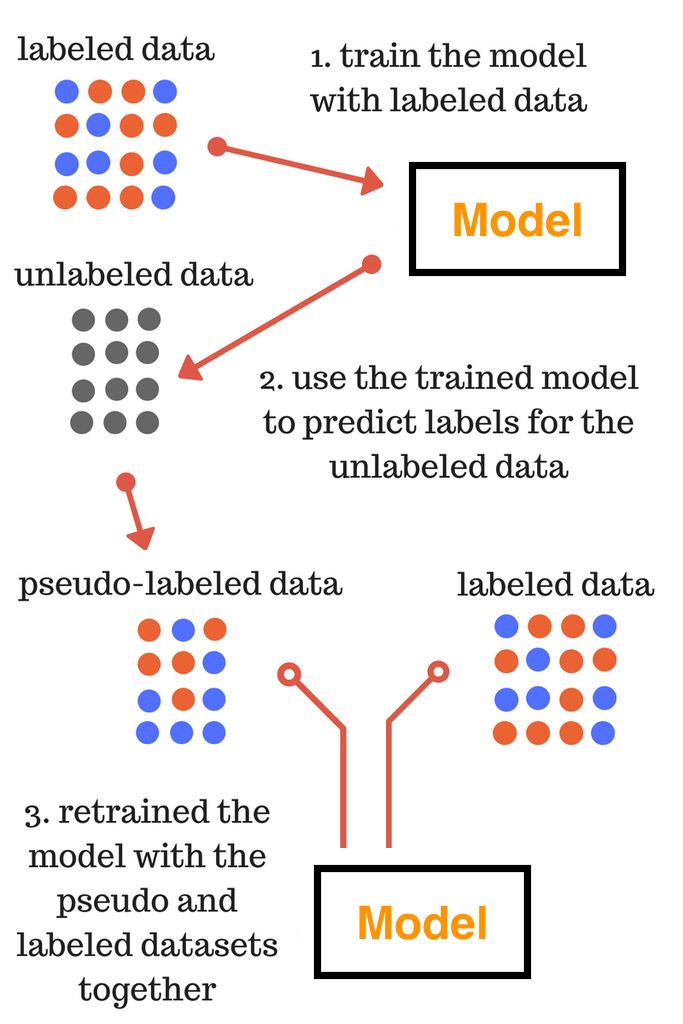

In [ ]:
# from sklearn.manifold import TSNE

# X_tsne = TSNE(n_components=2, learning_rate='auto', init='random',
#               perplexity=100, n_iter=50000).fit_transform(np.reshape(train_data, (32298,48*48)))

# label = []
# for i in train_labels:
#   label.append(list(i).index(1))

# plt.scatter(X_tsne[:,0], X_tsne[:,1], c=label, alpha=0.1)

## CNN

We have built ourselves a Convolutional Neural Network which has convolutional layers armed with filters that extract features out of images. 

Callback functions are those functions which are called at the end of every epoch and in this model, we use two callback functions - ReduceLROnPlateau and EarlyStopping. 



> **1. ReduceLROnPlateau:** monitors a certain variable, in this case, validation loss and alters the learning rate when the value stops significantly changing after some certain number of epochs (patience).

>  **2. EarlyStopping:** At times our optimiser can land in *local optima* and get stuck there. There is no point in continuing the training as there won't be any further improvements. 

> **3. ModelCheckpoin**t: Saves the best version of our model along with the weights, so that in case any crash occurs, our model can be recovered.

![Network Architecture](https://i.imgur.com/rG5p7JS.png)

We have used Keras to deploy our neural network and if you look at the architecture then you will notice that we have used Dropout layers frequently. Dropout layers inhibit overfitting by randomly dropping out units from the neural network. We will use 20 percent of the training data as validation data.





In [ ]:
# #######HYPERPARAMATERS###########
# epochs = 100
# batch_size = 64
# # batch_size = 1024 # x4 aug 에서, 너무 오래걸려서 배치사이즈 크게
# learning_rate = 0.001
# # learning_rate = 0.005 # x4 aug 에서, 배치사이즈 키워서 보폭 더 넓게
# #################################
  
# model = Sequential()
    
# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
# model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
# model.add(Dropout(0.5))
    
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))
    
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))
    
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))
    
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))
# adam = keras.optimizers.Adam(learning_rate)
# model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
# # print(model.summary())

# lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
# early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
# checkpointer = ModelCheckpoint('/content/drive/MyDrive/파이썬스터디 프로젝트/Model/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

# model.fit(
#           train_data_aug,
#           train_labels_aug,
#           epochs = epochs,
#           batch_size = batch_size,
#           validation_split = 0.2,
#           shuffle = True,
#           callbacks=[lr_reducer, checkpointer, early_stopper]
#           )

In [ ]:
# model.save('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model.h5')

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model.h5')

## 모델 결과

We trained the neural network and we achieved the highest validation accuracy of 62.43%. Now, we will use the test data to check how well our model generalizes. 

We score an astounding 63.17% on the test set. Though we barely, made it to the first division, we still made it to the 9th rank of the Kaggle competition.

1. no augmentation : 62~63% (100, 64, 0.001)
2. 2x augmentation : 67~68% (100, 64, 0.001)
3. 4x augmentation : 67~68% (100, 1024, 0.005)

In [ ]:
# predicted_test_labels = np.argmax(model.predict(test_data), axis=1)
# test_labels = np.argmax(test_labels, axis=1)
# print ("Accuracy score = ", accuracy_score(test_labels, predicted_test_labels))

## 준지도 pseudo labeling (self train)

모델성능이 70% 미만 -> 틀렸을 가능성이 높은 데이터들은 사용 X (최대한 70% 안에 있는 것을 맞춰서 사용)

수 회 예측결과의 분산이 작은 이미지일수록 기존 데이터셋(labeled)과 비슷하고, 분산이 클 수록 새로운 이미지일까?

In [ ]:
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/face_array.pkl', 'rb') as f:
	data_no_label = pickle.load(f)

In [ ]:
data_no_label.shape

(67224, 48, 48, 1)

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model.h5')
# pred = model.predict(data_no_label)

self training 시킬 것들을 어떻게 정하지
1. 예측결과의 확률 값이 큰 걸로?
2. 예측결과들의 분류 결과가 일치하는 걸로?

In [ ]:
# group_a = []
# group_a_label = []

# group_b = []
# group_b_label = []

# for i in range(67224):
#   temp = np.max(list(pred[i]))
#   if temp > 0.95:
#     group_a.append(i)
#     group_a_label.append(list(pred[i]).index(temp))
#   if temp < 0.95:
#     group_b.append(i)
#     group_b_label.append(list(pred[i]).index(temp))

# a_train = data_no_label[group_a]
# b_train = data_no_label[group_b]

# a_label = []
# b_label = []

# for i in group_a_label:
#   temp = [0,0,0,0,0,0,0]
#   temp[i] = 1
#   a_label.append(temp)

# for i in group_b_label:
#   temp = [0,0,0,0,0,0,0]
#   temp[i] = 1
#   b_label.append(temp)

# a_label = np.array(a_label)
# b_label = np.array(b_label)

In [ ]:
# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_train.pkl', 'wb') as f:
#   pickle.dump(a_train, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_label.pkl', 'wb') as f:
#   pickle.dump(a_label, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_train.pkl', 'wb') as f:
#   pickle.dump(b_train, f, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_label.pkl', 'wb') as f:
#   pickle.dump(b_label, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_train.pkl', 'rb') as f:
	a_train = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/a_label.pkl', 'rb') as f:
	a_label = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_train.pkl', 'rb') as f:
	b_train = pickle.load(f)
 
with open('/content/drive/MyDrive/파이썬스터디 프로젝트/b_label.pkl', 'rb') as f:
	b_label = pickle.load(f)

In [ ]:
a_train = np.concatenate((train_data_aug, a_train), 0)

In [ ]:
a_label = np.concatenate((train_labels_aug, a_label), 0)

In [ ]:
t = list(a_label[0])
for i in range(1, 36899):
  t += a_label[i]
t

array([5112.,  556., 5260., 9280., 6247., 4068., 6376.])

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_base_model.h5')

# #######HYPERPARAMATERS###########
# epochs = 20 #재학습
# batch_size = 64
# learning_rate = 0.1**7 #재학습
# #################################

# lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
# early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
# checkpointer = ModelCheckpoint('/content/drive/MyDrive/파이썬스터디 프로젝트/Model/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

# model.fit(
#           a_train,
#           a_label,
#           epochs = epochs,
#           batch_size = batch_size,
#           # validation_split = 0.5,
#           shuffle = True,
#           # callbacks=[lr_reducer, checkpointer, early_stopper],
#           # class_weight=class_weight
#           )

In [ ]:
# model.save('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220110_model.h5')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220110_model.h5')

In [ ]:
predicted_test_labels = np.argmax(model.predict(test_data), axis=1)
test_labels2 = np.argmax(test_labels, axis=1)
print ("Accuracy score = ", accuracy_score(test_labels2, predicted_test_labels))

Accuracy score =  0.6870994706046253


2차

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220110_model.h5')
data_no_label = b_train
pred = model.predict(data_no_label)

In [ ]:
train_data_aug = a_train
train_labels_aug = a_label

In [ ]:
group_a = []
group_a_label = []

group_b = []
group_b_label = []

for i in range(b_train.shape[0]):
  temp = np.max(list(pred[i]))
  if temp > 0.95:
    group_a.append(i)
    group_a_label.append(list(pred[i]).index(temp))
  if temp < 0.95:
    group_b.append(i)
    group_b_label.append(list(pred[i]).index(temp))

a_train = data_no_label[group_a]
b_train = data_no_label[group_b]

a_label = []
b_label = []

for i in group_a_label:
  temp = [0,0,0,0,0,0,0]
  temp[i] = 1
  a_label.append(temp)

for i in group_b_label:
  temp = [0,0,0,0,0,0,0]
  temp[i] = 1
  b_label.append(temp)

a_label = np.array(a_label)
b_label = np.array(b_label)

In [ ]:
a_train = np.concatenate((train_data_aug, a_train), 0)

In [ ]:
a_label = np.concatenate((train_labels_aug, a_label), 0)

In [ ]:
# model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220110_model.h5')

# #######HYPERPARAMATERS###########
# epochs = 20 #재학습
# batch_size = 64
# learning_rate = 0.1**7 #재학습
# #################################

# lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
# early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
# checkpointer = ModelCheckpoint('/content/drive/MyDrive/파이썬스터디 프로젝트/Model/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

# model.fit(
#           a_train,
#           a_label,
#           epochs = epochs,
#           batch_size = batch_size,
#           # validation_split = 0.5,
#           shuffle = True,
#           # callbacks=[lr_reducer, checkpointer, early_stopper],
#           # class_weight=class_weight
#           )

In [ ]:
# model.save('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220111_model.h5')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220111_model.h5')

In [ ]:
predicted_test_labels = np.argmax(model.predict(test_data), axis=1)
test_labels2 = np.argmax(test_labels, axis=1)
print ("Accuracy score = ", accuracy_score(test_labels2, predicted_test_labels))

Accuracy score =  0.6921147952075787


3차

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220111_model.h5')
data_no_label = b_train
pred = model.predict(data_no_label)

In [ ]:
train_data_aug = a_train
train_labels_aug = a_label

In [ ]:
group_a = []
group_a_label = []

group_b = []
group_b_label = []

for i in range(b_train.shape[0]):
  temp = np.max(list(pred[i]))
  if temp > 0.95:
    group_a.append(i)
    group_a_label.append(list(pred[i]).index(temp))
  if temp < 0.95:
    group_b.append(i)
    group_b_label.append(list(pred[i]).index(temp))

a_train = data_no_label[group_a]
b_train = data_no_label[group_b]

a_label = []
b_label = []

for i in group_a_label:
  temp = [0,0,0,0,0,0,0]
  temp[i] = 1
  a_label.append(temp)

for i in group_b_label:
  temp = [0,0,0,0,0,0,0]
  temp[i] = 1
  b_label.append(temp)

a_label = np.array(a_label)
b_label = np.array(b_label)

In [ ]:
a_label.shape

(5591, 7)

In [ ]:
a_train = np.concatenate((train_data_aug, a_train), 0)

In [ ]:
a_label = np.concatenate((train_labels_aug, a_label), 0)

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220111_model.h5')

#######HYPERPARAMATERS###########
epochs = 20 #재학습
batch_size = 64
learning_rate = 0.1**7 #재학습
#################################

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
checkpointer = ModelCheckpoint('/content/drive/MyDrive/파이썬스터디 프로젝트/Model/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

model.fit(
          a_train,
          a_label,
          epochs = epochs,
          batch_size = batch_size,
          # validation_split = 0.5,
          shuffle = True,
          # callbacks=[lr_reducer, checkpointer, early_stopper],
          # class_weight=class_weight
          )

In [ ]:
model.save('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220111_model_2.h5')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/파이썬스터디 프로젝트/cnn_220111_model_2.h5')

In [ ]:
predicted_test_labels = np.argmax(model.predict(test_data), axis=1)
test_labels2 = np.argmax(test_labels, axis=1)
print ("Accuracy score = ", accuracy_score(test_labels2, predicted_test_labels))

# CRNN

In [ ]:
#######HYPERPARAMATERS###########
epochs = 100
batch_size = 64
learning_rate = 0.005
#################################
  
model = Sequential()
    
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
    
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
    
# cnn to rnn
model.add(Reshape(target_shape=((5,5*256))))
model.add(Dense(256, activation='relu'))

# rnn
model.add(LSTM(256, return_sequences=True, activation='tanh'))
model.add(LSTM(256, return_sequences=True, activation='tanh'))
# model.add(LSTM(256, return_sequences=True, activation='tanh'))
model.add(Dropout(0.5))

model.add(LSTM(512, return_sequences=True, activation='tanh'))
model.add(LSTM(512, return_sequences=True, activation='tanh'))
# model.add(LSTM(512, return_sequences=True, activation='tanh'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

adam = keras.optimizers.Adam(learning_rate)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
# print(model.summary())

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=6, mode='auto')
checkpointer = ModelCheckpoint('weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

model.fit(
          train_data,
          train_labels,
          epochs = epochs,
          batch_size = batch_size,
          validation_split = 0.2,
          shuffle = True,
#           callbacks=[lr_reducer, checkpointer, early_stopper]
          callbacks=[lr_reducer, early_stopper]
          )

In [ ]:
predicted_test_labels = np.argmax(model.predict(test_data), axis=1)
test_labels2 = np.argmax(test_labels, axis=1)
print ("Accuracy score = ", accuracy_score(test_labels2, predicted_test_labels))